In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [7]:
df = pd.read_csv("../data/processed_school_data.csv")
df = df[df["OVERALL_SCORE"] != "."]
df['OVERALL_SCORE'] = df["OVERALL_SCORE"].astype(float)
df['CHARTER'] = df['CHARTER'].map(lambda x: True if x == "Yes" else (False if x == "No" else None))
print(df.shape)
df.head()

(11243, 28)


,DISTRICT_NUMBER,DISTRICT,CAMPUS_NUMBER,CAMPUS,REGION,COUNTY,SCHOOL_TYPE,GRADES_SERVED,CHARTER,URBANICITY,...,RACE_ASIAN,RACE_BLACK_OR_AFRICAN_AMERICAN,RACE_HISPANIC/LATINO,RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,RACE_TWO_OR_MORE_RACES,RACE_WHITE,TEACHERS_COUNT,LAT,LONG,MEDIAN_HOUSEHOLD_INCOME_AREA
0,1902,CAYUGA ISD,1902001.0,CAYUGA H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,False,Rural,...,2.0,12.0,36.0,0.0,16.0,276.0,19.34,31.9569,-95.9744,72483.0
1,1902,CAYUGA ISD,1902041.0,CAYUGA MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,False,Rural,...,2.0,16.0,32.0,0.0,18.0,264.0,11.20,31.9569,-95.9744,72483.0
2,1902,CAYUGA ISD,1902103.0,CAYUGA EL,REGION 07: KILGORE,ANDERSON,Elementary,PK - 05,False,Rural,...,2.0,28.0,44.0,0.0,20.0,420.0,17.86,31.9569,-95.9744,72483.0
3,1903,ELKHART ISD,1903001.0,ELKHART H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,False,Rural,...,6.0,24.0,76.0,2.0,20.0,502.0,35.72,31.6275,-95.5785,76397.0
4,1903,ELKHART ISD,1903041.0,ELKHART MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,False,Rural,...,0.0,18.0,62.0,0.0,16.0,442.0,23.82,31.6279,-95.5780,76397.0


In [ ]:
df.columns

Index(['DISTRICT_NUMBER', 'DISTRICT', 'CAMPUS_NUMBER', 'CAMPUS', 'REGION',
       'COUNTY', 'SCHOOL_TYPE', 'GRADES_SERVED', 'CHARTER', 'URBANICITY',
       'NUMBER_OF_STUDENTS', 'OVERALL_RATING', 'OVERALL_SCORE',
       '%_ECONOMICALLY_DISADVANTAGED', '%_EB/EL_STUDENTS',
       'FREE_LUNCH_QUALIFIED_COUNT', 'REDUCED-PRICE_LUNCH_QUALIFIED_COUNT',
       'RACE_AMERICAN_INDIAN_OR_ALASKA_NATIVE', 'RACE_ASIAN',
       'RACE_BLACK_OR_AFRICAN_AMERICAN', 'RACE_HISPANIC/LATINO',
       'RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER',
       'RACE_TWO_OR_MORE_RACES', 'RACE_WHITE', 'TEACHERS_COUNT', 'LAT', 'LONG',
       'MEDIAN_HOUSEHOLD_INCOME_AREA'],
      dtype='object')

# Analysis 1: Income

LinregressResult(slope=np.float64(7.914384322498232e-05), intercept=np.float64(73.24816260891208), rvalue=np.float64(0.2520553846017422), pvalue=np.float64(1.0820383466730578e-20), stderr=np.float64(8.344414791812909e-06), intercept_stderr=np.float64(0.6712435790813257))


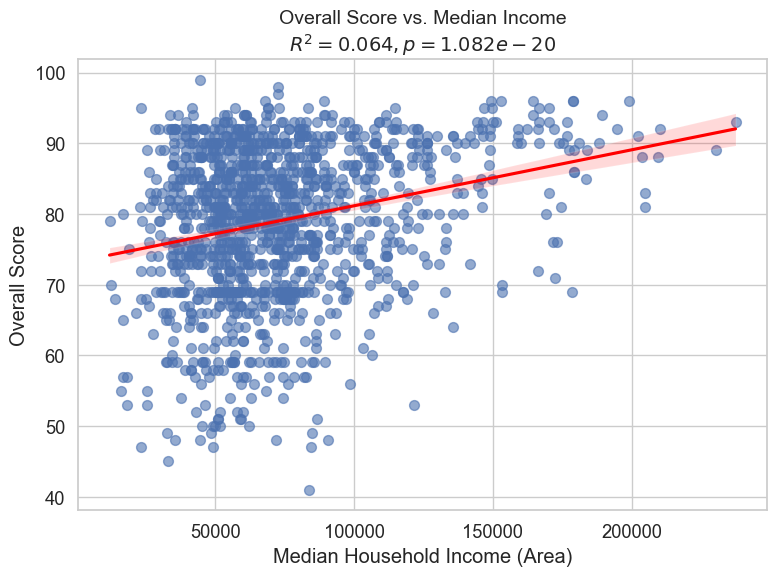

In [50]:
# Drop missing values
plot_df = df.dropna(subset=["MEDIAN_HOUSEHOLD_INCOME_AREA", "OVERALL_SCORE"])

# Compute regression
x = plot_df["MEDIAN_HOUSEHOLD_INCOME_AREA"]
y = plot_df["OVERALL_SCORE"]
obj = linregress(x, y)

print(obj)

# Plot
plt.figure(figsize=(8,6))
sns.regplot(
    x=x, y=y,
    scatter_kws={"alpha":0.6, "s":50},
    line_kws={"color":"red"}
)
plt.title(f"Overall Score vs. Median Income\n$R^2={r_value**2:.3f}, p={p_value:.3e}$", fontsize=14)
plt.xlabel("Median Household Income (Area)")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()

/var/folders/w4/nmyg6vtj22j16ymxyrbttbzm0000gn/T/ipykernel_66977/1600618626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


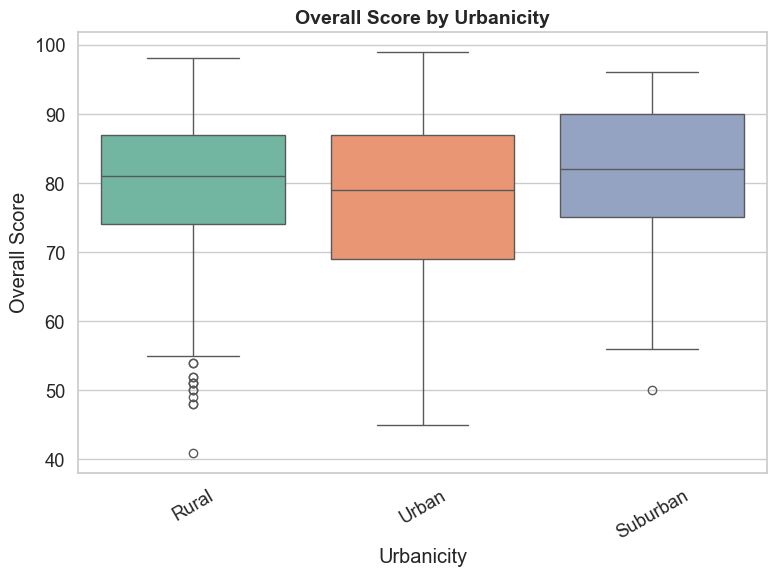

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=plot_df,
    x="URBANICITY",
    y="OVERALL_SCORE",
    palette="Set2"
)

plt.title("Overall Score by Urbanicity", fontsize=14, weight="bold")
plt.xlabel("Urbanicity")
plt.ylabel("Overall Score")
plt.xticks(rotation=30)  # rotate x labels if long
plt.tight_layout()
plt.show()

R^2: 0.001
p-value: 6.912e-03
Slope: -0.091, Intercept: 79.506


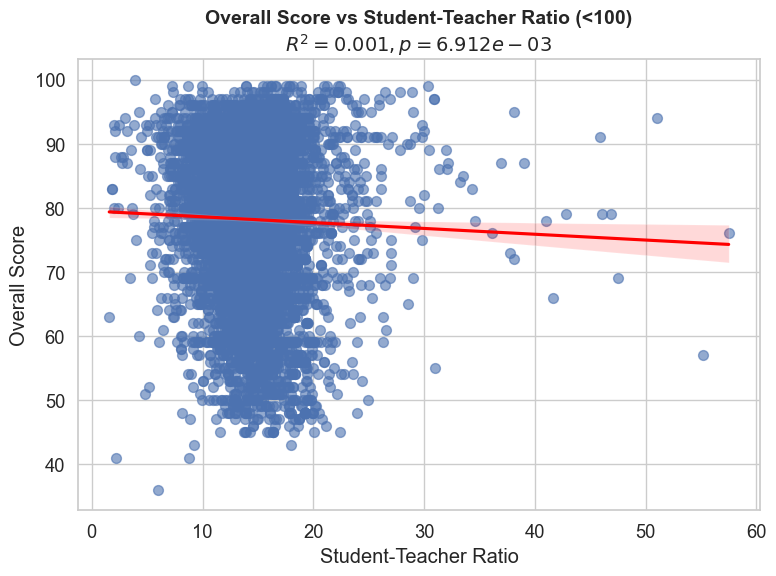

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Ensure numeric
df["TEACHERS_COUNT"] = pd.to_numeric(df["TEACHERS_COUNT"], errors='coerce')
df["NUMBER_OF_STUDENTS"] = pd.to_numeric(df["NUMBER_OF_STUDENTS"], errors='coerce')

# Compute student-teacher ratio
df["STUDENT_TEACHER_RATIO"] = df["NUMBER_OF_STUDENTS"] / df["TEACHERS_COUNT"]

# Filter: drop NaNs, infs, and extreme ratios
plot_df = df.dropna(subset=["STUDENT_TEACHER_RATIO", "OVERALL_SCORE"])
plot_df = plot_df[(plot_df["STUDENT_TEACHER_RATIO"] < 100) & (plot_df["STUDENT_TEACHER_RATIO"] != float('inf'))]

# Regression
x = plot_df["STUDENT_TEACHER_RATIO"]
y = plot_df["OVERALL_SCORE"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"R^2: {r_value**2:.3f}")
print(f"p-value: {p_value:.3e}")
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}")

# Plot
plt.figure(figsize=(8,6))
sns.regplot(
    x=x, y=y,
    scatter_kws={"alpha":0.6, "s":50},
    line_kws={"color":"red"}
)

plt.title(f"Overall Score vs Student-Teacher Ratio (<100)\n$R^2={r_value**2:.3f}, p={p_value:.3e}$", fontsize=14, weight="bold")
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()


R^2: 0.215, p-value: 0.000e+00, slope: -20.673


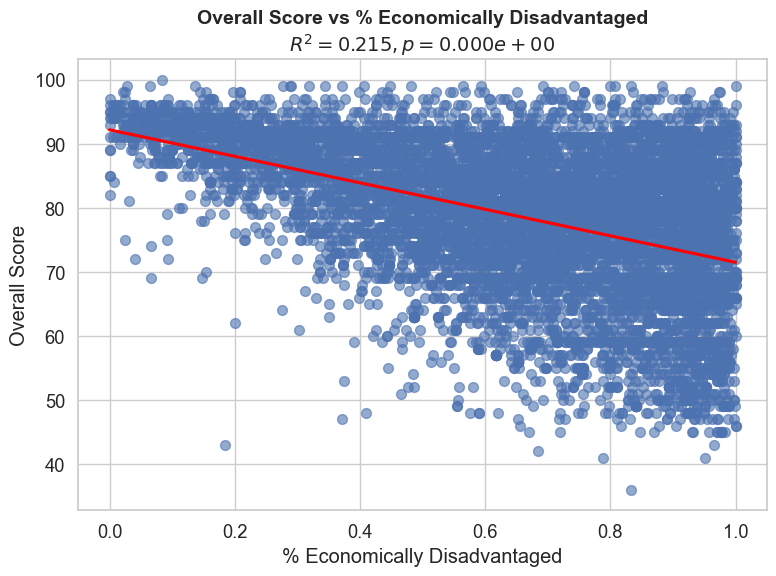

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure numeric
df["%_ECONOMICALLY_DISADVANTAGED"] = pd.to_numeric(df["%_ECONOMICALLY_DISADVANTAGED"], errors='coerce')

# Drop missing values
plot_df = df.dropna(subset=["%_ECONOMICALLY_DISADVANTAGED", "OVERALL_SCORE"])

# Regression
x = plot_df["%_ECONOMICALLY_DISADVANTAGED"]
y = plot_df["OVERALL_SCORE"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"R^2: {r_value**2:.3f}, p-value: {p_value:.3e}, slope: {slope:.3f}")

# Plot
plt.figure(figsize=(8,6))
sns.regplot(
    x=x,
    y=y,
    scatter_kws={"alpha":0.6, "s":50},
    line_kws={"color":"red"},
    ci=None
)

plt.title(f"Overall Score vs % Economically Disadvantaged\n$R^2={r_value**2:.3f}, p={p_value:.3e}$", fontsize=14, weight="bold")
plt.xlabel("% Economically Disadvantaged")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()


/var/folders/w4/nmyg6vtj22j16ymxyrbttbzm0000gn/T/ipykernel_72832/505304876.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


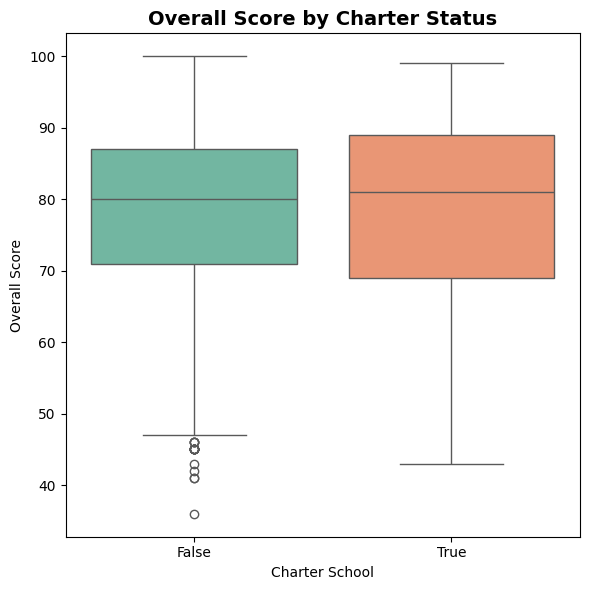

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
plot_df = df.dropna(subset=["CHARTER", "OVERALL_SCORE"])

plt.figure(figsize=(6,6))
sns.boxplot(
    data=plot_df,
    x="CHARTER",
    y="OVERALL_SCORE",
    palette="Set2"
)

plt.title("Overall Score by Charter Status", fontsize=14, weight="bold")
plt.xlabel("Charter School")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()


In [4]:
df.dtypes

DISTRICT_NUMBER                                     int64
DISTRICT                                           object
CAMPUS_NUMBER                                     float64
CAMPUS                                             object
REGION                                             object
COUNTY                                             object
SCHOOL_TYPE                                        object
GRADES_SERVED                                      object
CHARTER                                            object
URBANICITY                                         object
NUMBER_OF_STUDENTS                                  int64
OVERALL_RATING                                     object
OVERALL_SCORE                                     float64
%_ECONOMICALLY_DISADVANTAGED                      float64
%_EB/EL_STUDENTS                                  float64
FREE_LUNCH_QUALIFIED_COUNT                        float64
REDUCED-PRICE_LUNCH_QUALIFIED_COUNT               float64
RACE_AMERICAN_